# PFG - Gestión de Proyectos

# 1. Carga de datos

In [1]:
import pandas as pd

#### Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files

# Sube el archivo CSV
uploaded = files.upload()


Saving in-vehicle-coupon-recommendation.csv to in-vehicle-coupon-recommendation.csv


In [12]:
import io  # Import io module to handle file content

# Extrae el contenido del archivo CSV del diccionario
csv_content = next(iter(uploaded.values()))

# Intenta leer el archivo CSV con diferentes codificaciones
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
for encoding in encodings:
    try:
        df = pd.read_csv(io.StringIO(csv_content.decode(encoding)), sep=';')
        print("Archivo CSV leído exitosamente con la codificación:", encoding)
        break
    except UnicodeDecodeError:
        print("Error al leer el archivo CSV con la codificación:", encoding)

df.head()

NameError: name 'uploaded' is not defined

#### Visual Studio

In [2]:
df = pd.read_csv('in-vehicle-coupon-recommendation.csv', sep=';')

In [3]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# Objetivo Principal

El objetivo esencial es maximizar la aceptación de cupones por parte de los usuarios. Esto no solo aumenta el valor que se ofrecerá a los clientes (las empresas que promocionan sus productos o servicios a través de cupones), sino que también mejorará la experiencia del consumidor final, asegurando que reciban ofertas que sean de su interés y relevancia. Para lograr este objetivo, es crucial entender los factores que influyen en la decisión de los usuarios de aceptar un cupón y cómo podemos utilizar esta información para afinar las estrategias de marketing

# Descripcion de las variables

### Información Demográfica

* Edad (age): Proporciona información sobre el rango de edad del conductor, lo cual puede influir en sus preferencias de consumo y en su disposición a aceptar ciertos tipos de cupones.
* Género (gender): El género del conductor puede afectar las preferencias de productos o servicios, y por ende, la aceptación de cupones.
* Estado Civil (maritalStatus): El estado civil puede reflejar diferentes patrones de consumo o necesidades, influenciando qué ofertas son más atractivas.
* Nivel Educativo (education): El nivel de educación alcanzado puede correlacionarse con el poder adquisitivo o intereses específicos, afectando la respuesta a ciertos tipos de cupones.
* Ingresos (income): El rango de ingresos del conductor puede determinar su capacidad de gasto y, por tanto, su probable interés en ofertas específicas.

### Información sobre hábitos de consumo

* Frecuencia de visitas a bares (Bar): Indica con qué frecuencia el conductor visita bares, lo que puede ser relevante para cupones relacionados con bebidas o eventos sociales.
* Frecuencia de visitas a cafeterías (CoffeeHouse): Refleja la predisposición del conductor a consumir en cafeterías, útil para cupones de café o snacks.
* Frecuencia de pedidos de comida para llevar (CarryAway): Muestra la preferencia por la comida rápida o para llevar, importante para cupones de restaurantes o servicios de entrega.
* Frecuencia de visitas a restaurantes con gastos menores a $20 (RestaurantLessThan20) y entre $20 y $50 (Restaurant20To50): Estas características indican las preferencias de consumo en restaurantes y pueden ayudar a personalizar ofertas de cupones según el rango de gasto habitual del conductor.

### Información contextual sobre el viaje

* Destino (destination): La ubicación o propósito del viaje puede afectar la relevancia de los cupones ofrecidos, como ofertas para el hogar en viajes de regreso.
* Pasajeros (passanger): La compañía en el vehículo (amigos, hijos) puede influir en la decisión de aceptar cupones, especialmente para actividades grupales o familiares.
* Clima (weather) y Temperatura (temperature): Las condiciones meteorológicas y la temperatura pueden afectar la atracción hacia ciertas actividades o consumos, como bebidas calientes en días fríos.
* Tiempo (time): El momento del día puede determinar la relevancia de un cupón, como ofertas de desayuno por la mañana.

### Detalles específicos de la oferta del cupón

* Tipo de cupón (coupon): La categoría del cupón (restaurante, cafetería, etc.) es crucial para su atractivo y relevancia para el conductor.
* Expiración (expiration): El tiempo disponible para usar el cupón puede urgir al conductor a aceptarlo o rechazarlo basándose en su conveniencia.
* Distancia hasta el cupón (toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min): La proximidad de la oferta al conductor influye en la probabilidad de aceptación, especialmente si requiere un desvío.

# Análisis Exploratorio

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# remove duplicates
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(12610, 26)
(12610, 26)


In [26]:
# Verificar qué columnas contienen valores nulos
columnas_con_nulos = df.columns[df.isnull().any()].tolist()

print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


In [27]:
# Obtener el número de filas nulas para cada columna
for columna in columnas_con_nulos:
    num_nulos = df[columna].isnull().sum()
    print(f"Número de filas nulas en la columna '{columna}': {num_nulos}")

Número de filas nulas en la columna 'car': 12502
Número de filas nulas en la columna 'Bar': 107
Número de filas nulas en la columna 'CoffeeHouse': 217
Número de filas nulas en la columna 'CarryAway': 150
Número de filas nulas en la columna 'RestaurantLessThan20': 129
Número de filas nulas en la columna 'Restaurant20To50': 189


In [28]:
df.isna().sum() # suma de nulls en cada columna

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [29]:
df.isna().sum() / len(df) * 100 # porcentaje de nulls en cada columna

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.143537
Bar                      0.848533
CoffeeHouse              1.720856
CarryAway                1.189532
RestaurantLessThan20     1.022998
Restaurant20To50         1.498810
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

cars tiene el 99% de datos nulos

We can see that the total 6 attributes have missing values, from that 'car' feature has 99% of the missing value so we need to drop this feature.
Other features like 'bar', 'coffeehouse', 'carryaway', 'RestaurantLessThan20', and 'Restaurant20To50' have approx 1% of missing value, so we need to fill these missing values with some other value, for that we will use mode imputation.

In [31]:
df.drop(['car'], axis=1, inplace=True)

In [33]:
# fill nas with mode

df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0], inplace=True)
df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0], inplace=True)
df['CarryAway'].fillna(df['CarryAway'].mode()[0], inplace=True)
df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0], inplace=True)
df['Bar'].fillna(df['Bar'].mode()[0], inplace=True)

In [34]:
y  = df['Y'].value_counts()
y

Y
1    7157
0    5453
Name: count, dtype: int64

la variable objetivo `Y` esta desbalanceada pero no es sufifiente para hacer oversampling. Se seguira trabajando asi.

In [35]:
#Correlation of Features

numeric_categorical_features = df.select_dtypes(include=['int', 'float']).columns
df_numeric_categorical = df[numeric_categorical_features]
df_numeric_categorical.corr()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.018599,NaN,-0.157089,-0.227165,0.097972,-0.097972,0.059393
has_children,-0.018599,1.000000,NaN,0.079434,-0.010773,-0.032353,0.032353,-0.045056
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.157089,0.079434,NaN,1.000000,0.321260,-0.302066,0.302066,-0.082693
toCoupon_GEQ25min,-0.227165,-0.010773,NaN,0.321260,1.000000,-0.189900,0.189900,-0.108139
direction_same,0.097972,-0.032353,NaN,-0.302066,-0.189900,1.000000,-1.000000,0.014932
direction_opp,-0.097972,0.032353,NaN,0.302066,0.189900,-1.000000,1.000000,-0.014932
Y,0.059393,-0.045056,NaN,-0.082693,-0.108139,0.014932,-0.014932,1.000000


1. Feature 'direction_same' is perfectly correlated with 'direction_opp', both have the same variance.
2. 'toCoupon_GEQ5min' feature has no correlation with any feature because it has the same value '1' for all data points, which means all the restaurants/bars are at least more than five minutes away from the driver.

so, drop both 'direction_opp' and 'toCoupon_GEQ5min' features.

In [36]:
df.drop(['direction_opp','toCoupon_GEQ5min'], axis=1, inplace=True)

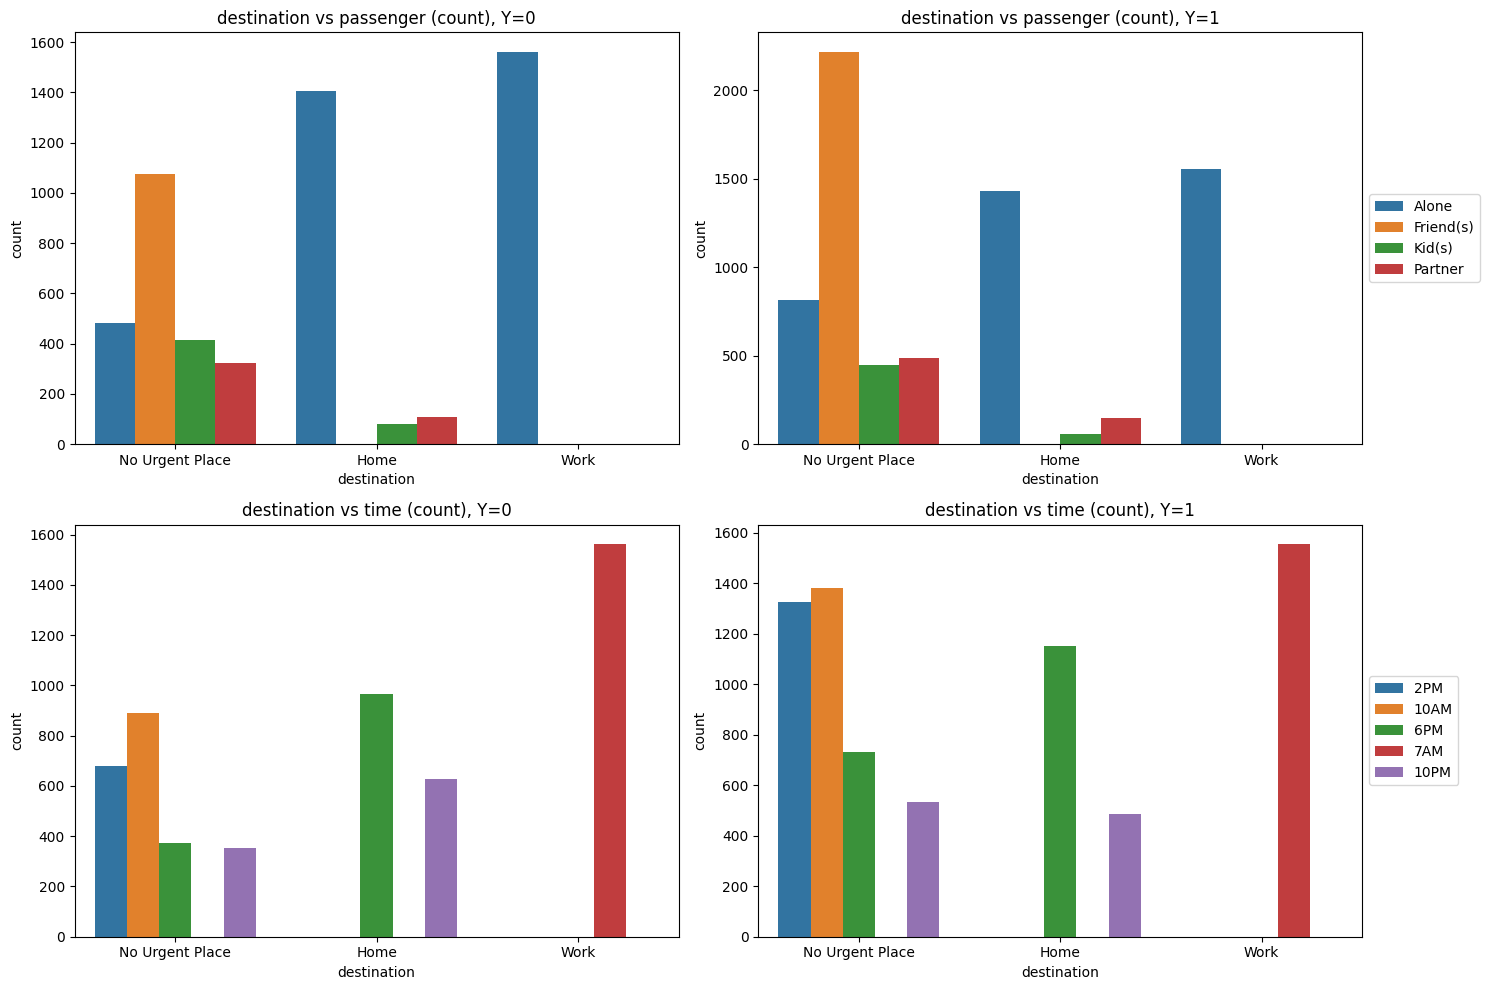

In [37]:
# Define the order of unique values for each variable
destination_order = df['destination'].unique()
passenger_order = df['passanger'].unique()
time_order = df['time'].unique()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for 'destination' vs 'passenger', Y=0
sns.countplot(x='destination', hue='passanger', data=df[df['Y'] == 0], ax=axes[0, 0], order=destination_order, hue_order=passenger_order)
axes[0, 0].set_title('destination vs passenger (count), Y=0')
axes[0, 0].legend().remove()


# Plot for 'destination' vs 'passenger', Y=1
sns.countplot(x='destination', hue='passanger', data=df[df['Y'] == 1], ax=axes[0, 1], order=destination_order, hue_order=passenger_order)
axes[0, 1].set_title('destination vs passenger (count), Y=1')

# Set legend on the right
axes[0, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plot for 'destination' vs 'time', Y=0
sns.countplot(x='destination', hue='time', data=df[df['Y'] == 0], ax=axes[1, 0], order=destination_order, hue_order=time_order)
axes[1, 0].set_title('destination vs time (count), Y=0')
axes[1, 0].legend().remove()


# Plot for 'destination' vs 'time', Y=1
sns.countplot(x='destination', hue='time', data=df[df['Y'] == 1], ax=axes[1, 1], order=destination_order, hue_order=time_order)
axes[1, 1].set_title('destination vs time (count), Y=1')

# Set legend on the right
axes[1, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

- The users who go with Friends have only No Urgent Place destination.
- Maximum users accept coupons when the time is 2 PM and 10 AM, the destination is No Urgent Place, and the co-passanger is Friends.
- The users who have destination Home and Work have almost similar coupon acceptance ratios.

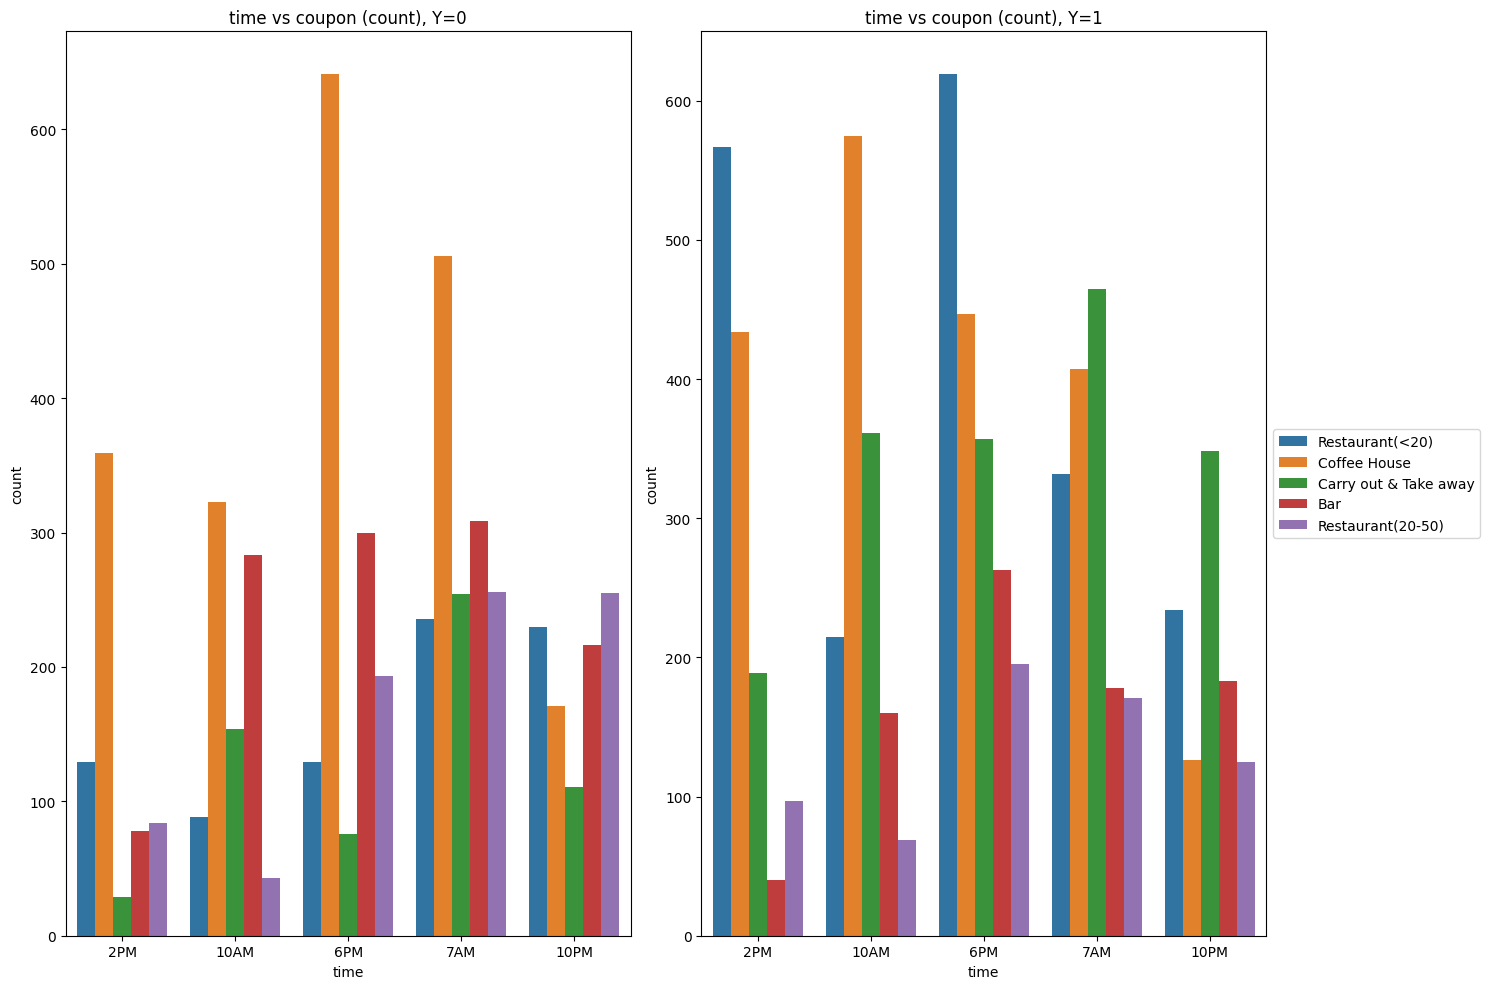

In [38]:
# Define the order of unique values for each variable
coupon_order = df['coupon'].unique()
time_order = df['time'].unique()

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot for 'destination' vs 'passenger', Y=0
sns.countplot(x='time', hue='coupon', data=df[df['Y'] == 0], ax=axes[0], order=time_order, hue_order=coupon_order)
axes[0].set_title('time vs coupon (count), Y=0')
axes[0].legend().remove()


# Plot for 'destination' vs 'passenger', Y=1
sns.countplot(x='time', hue='coupon', data=df[df['Y'] == 1], ax=axes[1], order=time_order, hue_order=coupon_order)
axes[1].set_title('time vs coupon (count), Y=1')

# Set legend on the right
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


fig.tight_layout()
plt.show()

- At 10AM, 2 PM and 6 PM, users mostly accept Restaurant(<20), Carry out and coffee house coupons.
- At 7 AM, 10AM, 2PM and 6 PM, Coffee House coupon ask is maximum.
- At 10 PM, mostly Carry out & Take away and Restaurant(<20) coupons are accepted, and Restaurant(20–50) coupons are rejected.
- Users mostly reject coupons for Bar at 7 AM, 10 AM, and 2 PM

*to_Coupon*

‘toCoupon_GEQ15min’ and ‘toCoupon_GEQ25min’ features tell the driving distance to the restaurant/coffee house/bar, so we can combine them and make a new feature called ‘to_coupon’.

‘toCoupon_GEQ15min’ and ‘toCoupon_GEQ25min’ features have two categorical values 0 & 1 and ‘to_coupon’ has three categorical value 0,1 & 2.

- 0: driving distance is less than or equal to 15 min
- 1: driving distance is greater than 15 min and less than or equal to 25 min
- 2: driving distance is greater than 25 min

In [39]:
df['to_Coupon'] = 2
df.loc[df['toCoupon_GEQ15min'] == 0, 'to_Coupon'] = 0
df.loc[(df['toCoupon_GEQ15min'] == 1) & (df['toCoupon_GEQ25min'] == 0), 'to_Coupon'] = 1

print('Unique values:', df['to_Coupon'].unique())
print('-' * 50)

print(df['to_Coupon'].describe())

Unique values: [0 1 2]
--------------------------------------------------
count    12610.000000
mean         0.675813
std          0.671687
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: to_Coupon, dtype: float64


In [42]:
def percent_value_counts(df, feature):
    data = pd.DataFrame(sorted(list(df[feature].unique())),columns=[feature])
    data['Total_Count'] = list(df.groupby(feature).Y.count())
    data['Total_%'] = round(data['Total_Count']/df[feature].shape[0]*100,3)
    data['Accepted'] = list(df[df.Y==1].groupby(feature).Y.count())
    data['Rejected'] = list(df[df.Y==0].groupby(feature).Y.count())
    data['%Accepted'] = round(data['Accepted']/data['Total_Count']*100,3)
    data['%Rejected'] = round(data['Rejected']/data['Total_Count']*100,3)
    return data

In [43]:
def univariate_analysis(df, feature):
    df_EDA = percent_value_counts(df, feature)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)
    
    fig = plt.subplots(figsize =(8, 4))
    plt.barh(df_EDA[feature],df_EDA['Total_Count'])
    plt.barh(df_EDA[feature],df_EDA['Accepted'])
    plt.legend(labels=['Total','Accepted'])
    plt.xlabel('Counts')
    plt.title(feature+' wise accepted coupons')
    plt.show()

    return df_EDA

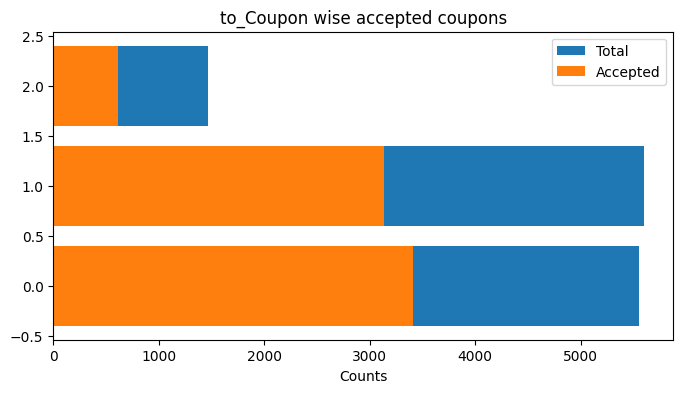

,to_Coupon,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
1,1,5596,44.377,3136,2460,56.040,43.960
0,0,5551,44.021,3407,2144,61.376,38.624
2,2,1463,11.602,614,849,41.969,58.031


In [44]:
univariate_analysis(df,'to_Coupon')

We can see that most coupons offered are nearby within 25 minutes. Also, users generally accept coupons that are less than 25 minutes distance.

In [45]:
df.drop(['toCoupon_GEQ15min','toCoupon_GEQ25min'], axis=1, inplace=True)

‘coupon_freq’ is a combination of five features, RestaurantLessThan20, CoffeeHouse, CarryAway, Bar, and Restaurant20To50. These five features tell how frequently a user is going to RestaurantLessThan20, CoffeeHouse, CarryAway, Bar, and Restaurant20To50.

Every user is asked for a single coupon, so we need only the frequency of that one coupon type, other coupon details are not needed. so we create a new feature that tells how frequently a user used the asked coupon.

In [46]:
coupon_map = {
    'Restaurant(<20)': 'RestaurantLessThan20',
    'Coffee House': 'CoffeeHouse',
    'Carry out & Take away': 'CarryAway',
    'Bar': 'Bar',
    'Restaurant(20-50)': 'Restaurant20To50'
}

# Use the map function to create the 'coupon_freq' column
df['coupon_freq'] = df['coupon'].map(coupon_map)
df['coupon_freq'] = df.apply(lambda row: row[row['coupon_freq']], axis=1)
# Print unique values
print('Unique values:', df['coupon_freq'].unique())
print('-' * 50)

# Describe the 'coupon_freq' column
print(df['coupon_freq'].describe())

Unique values: ['4~8' 'never' '1~3' 'less1' 'gt8']
--------------------------------------------------
count     12610
unique        5
top         1~3
freq       3870
Name: coupon_freq, dtype: object


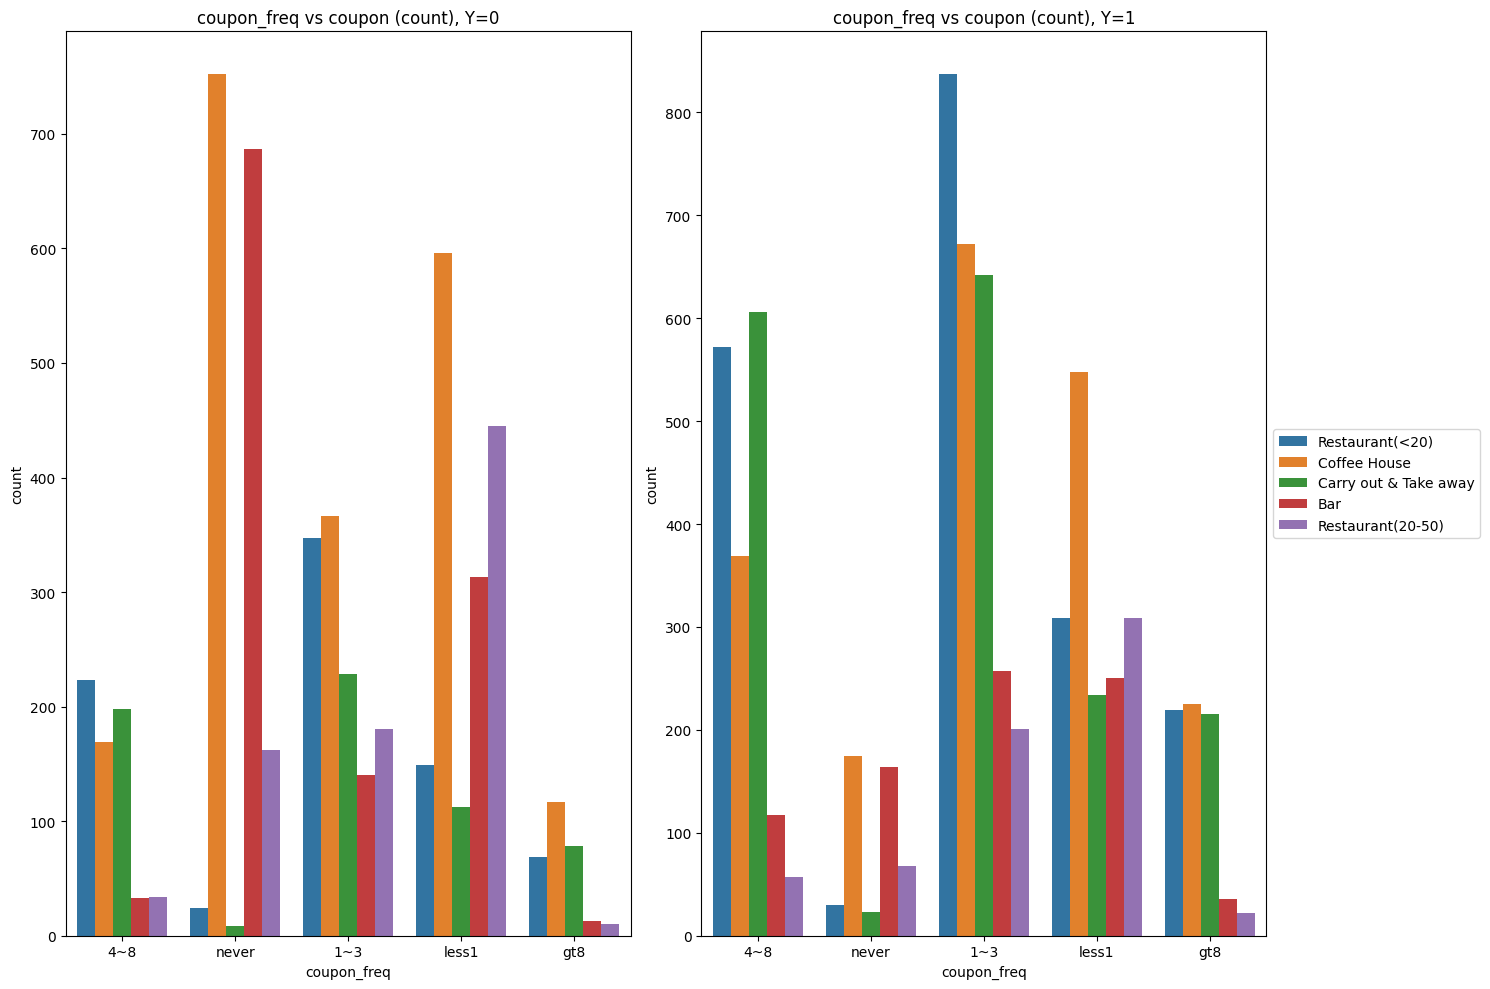

In [47]:
# Define the order of unique values for each variable
coupon_order = df['coupon'].unique()
coupon_freq_order = df['coupon_freq'].unique()

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot for 'destination' vs 'passenger', Y=0
sns.countplot(x='coupon_freq', hue='coupon', data=df[df['Y'] == 0], ax=axes[0], order=coupon_freq_order, hue_order=coupon_order)
axes[0].set_title('coupon_freq vs coupon (count), Y=0')
axes[0].legend().remove()


# Plot for 'destination' vs 'passenger', Y=1
sns.countplot(x='coupon_freq', hue='coupon', data=df[df['Y'] == 1], ax=axes[1], order=coupon_freq_order, hue_order=coupon_order)
axes[1].set_title('coupon_freq vs coupon (count), Y=1')

# Set legend on the right
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


fig.tight_layout()
plt.show()

Most users in this data have visited more than one time Restaurant(<$20) and Carry Away services and also they have the highest coupon acceptance ratio.
Users who visited Coffee House 1to3 times and 4to8 times have also higher coupon acceptance ratio.
Most users visited an expensive Restaurant only once and users who visited an expensive Restaurant greater than 4 times have the highest coupon acceptance ratio for an expensive Restaurant.
Most users in this data never visit a Bar and most of them reject the bar coupon and users who visited Bar 1to3 times or 4to8 times have a higher coupon acceptance ratio.



In [48]:
df.drop(['RestaurantLessThan20','CoffeeHouse', 'CarryAway', 'Bar', 'Restaurant20To50'], axis=1, inplace=True)

*occupation_class*

occupation feature has 25 no of distinct values, which creates very sparsity in the data matrix after encoding so we can try to convert it into a new feature called occupation_class.

We will divide them into five categories in the order of acceptance ratio of coupons:

4: High
3: Medium_high
2: medium
1: Medium_low
0: Low

In [49]:
occupation_acceptance_rate = df.groupby("occupation")["Y"].mean()

quintiles = pd.qcut(occupation_acceptance_rate, 5, labels=False)

occupation_class = pd.Series(quintiles, index=occupation_acceptance_rate.index)

df["occupation_class"] = df["occupation"].map(occupation_class)

df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,direction_same,Y,to_Coupon,coupon_freq,occupation_class
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,1,0,4~8,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,0,never,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,1,1,1~3,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,1,never,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,1,never,1


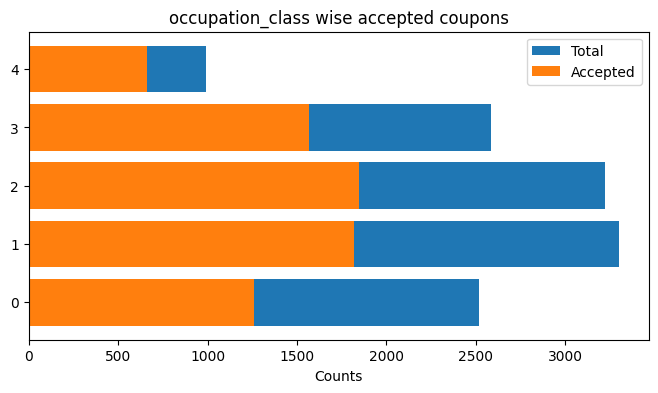

,occupation_class,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
1,1,3300,26.170,1821,1479,55.182,44.818
2,2,3221,25.543,1849,1372,57.405,42.595
3,3,2583,20.484,1566,1017,60.627,39.373
0,0,2517,19.960,1258,1259,49.980,50.020
4,4,989,7.843,663,326,67.037,32.963


In [50]:
univariate_analysis(df,'occupation_class')

In [ ]:
df.drop(['occupation'], axis=1, inplace=True)

In [53]:
# ENCODING

from sklearn.preprocessing import OrdinalEncoder

order = [['Work','Home','No Urgent Place'],
         ['Kid(s)','Alone','Partner','Friend(s)'],
         ['Rainy','Snowy','Sunny'],
         [30,55,80],
         ['7AM','10AM','2PM','6PM','10PM'],
         ['Bar','Restaurant(20-50)','Coffee House','Restaurant(<20)','Carry out & Take away'],
         ['2h','1d'],
         ['Female','Male'],
         ['below21','21','26','31','36','41','46','50plus'],
         ['Widowed','Divorced','Married partner','Unmarried partner','Single'],
         ['Some High School','High School Graduate','Some college - no degree','Associates degree','Bachelors degree','Graduate degree (Masters or Doctorate)'],
         ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More'],
         ['never','less1','1~3','4~8','gt8']]
Ordinal_enc = OrdinalEncoder(categories=order)
columns_to_encode = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'income', 'coupon_freq']
data_to_encode = df[columns_to_encode]
df_Ordinal_encoding = Ordinal_enc.fit_transform(data_to_encode)
df[columns_to_encode] = df_Ordinal_encoding
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,income,direction_same,Y,to_Coupon,coupon_freq,occupation_class
0,2.0,1.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,3.0,1,2.0,3.0,0,1,0,3.0,1
1,2.0,3.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,3.0,1,2.0,3.0,0,0,0,0.0,1
2,2.0,3.0,2.0,2.0,1.0,4.0,0.0,0.0,1.0,3.0,1,2.0,3.0,0,1,1,2.0,1
3,2.0,3.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,3.0,1,2.0,3.0,0,0,1,0.0,1
4,2.0,3.0,2.0,2.0,2.0,2.0,1.0,0.0,1.0,3.0,1,2.0,3.0,0,0,1,0.0,1


In [54]:
# separating our independent and dependent variable
X = df.drop(['Y'], axis = 1)
y = df["Y"]

In [12]:
import plotly.express as px

In [13]:
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'destination'}>,
        <Axes: title={'center': 'passanger'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temperature'}>],
       [<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'coupon'}>,
        <Axes: title={'center': 'expiration'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'maritalStatus'}>,
        <Axes: title={'center': 'has_children'}>,
        <Axes: title={'center': 'education'}>],
       [<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'direction_same'}>,
        <Axes: title={'center': 'to_Coupon'}>,
        <Axes: title={'center': 'coupon_freq'}>],
       [<Axes: title={'center': 'occupation_class'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

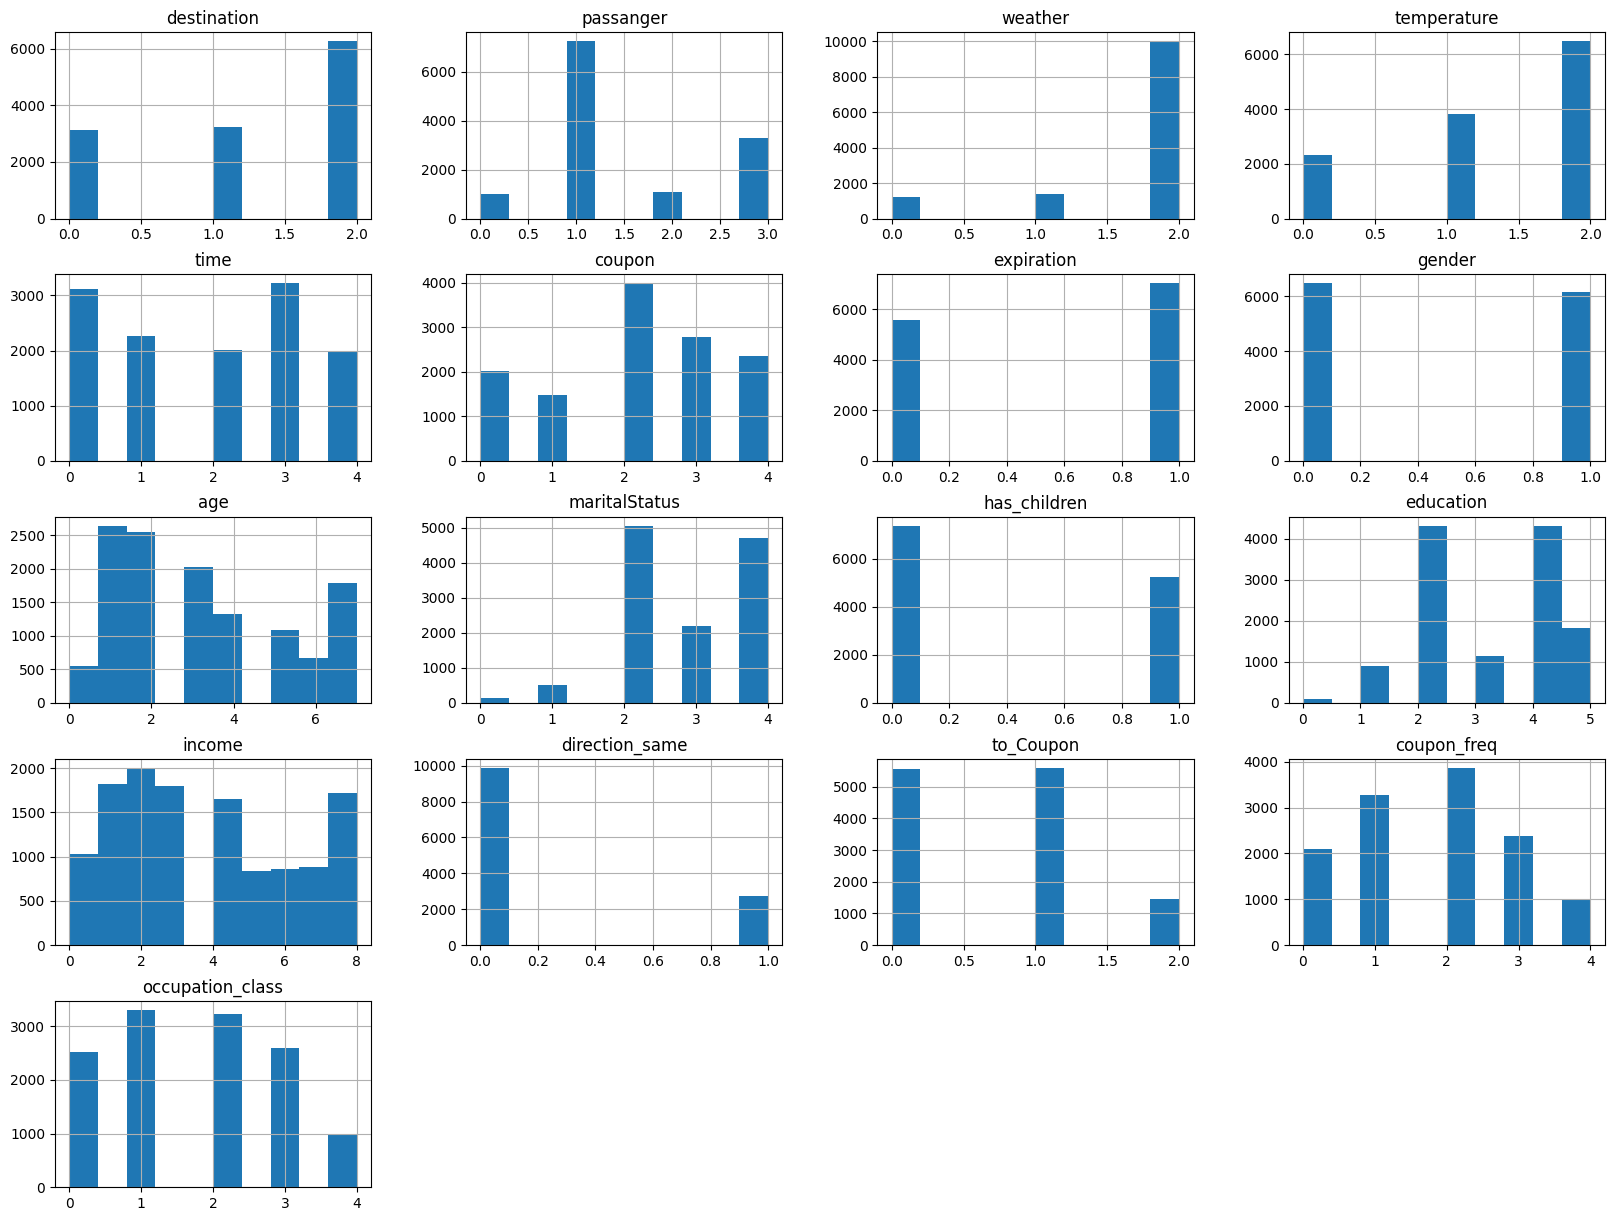

In [58]:
X.hist(figsize=(20, 15))